In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import yfinance as yf

In [2]:
# Define period
start = "2018-08-07"
end = "2023-08-07"
period = "1d"

## Hospitality Data Analysis

Name | Symbol
|----|-------|
HST | Host Hotels & Resorts Inc
HLT | Hilton Hotels Corporation
MAR | Marriott International Inc
CHH | Choice Hotels International Inc
H | Hyatt Hotels Corp
<!-- ABNB | Airbnb Inc -->

In [16]:
# Read CSV
stocks_hist = pd.read_csv("data/hosp.csv")
stocks_hist

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Stock,% change
0,2018-08-07 00:00:00-04:00,18.775547,18.775547,18.531934,18.601538,7584900,0.0,0.0,HST,-0.93
1,2018-08-08 00:00:00-04:00,18.671144,18.923458,17.809801,17.879404,12959400,0.0,0.0,HST,-4.24
2,2018-08-09 00:00:00-04:00,17.862002,17.966407,17.792399,17.827200,11420100,0.0,0.0,HST,-0.19
3,2018-08-10 00:00:00-04:00,17.757601,17.818504,17.522689,17.635796,8288300,0.0,0.0,HST,-0.69
4,2018-08-13 00:00:00-04:00,17.635794,17.740198,17.383480,17.487886,6328700,0.0,0.0,HST,-0.84
...,...,...,...,...,...,...,...,...,...,...
6280,2023-07-31 00:00:00-04:00,125.790001,127.800003,125.790001,126.349998,782800,0.0,0.0,H,0.45
6281,2023-08-01 00:00:00-04:00,125.750000,126.349998,123.459999,125.029999,754000,0.0,0.0,H,-0.57
6282,2023-08-02 00:00:00-04:00,123.550003,124.720001,122.300003,122.339996,1049900,0.0,0.0,H,-0.98
6283,2023-08-03 00:00:00-04:00,116.000000,116.000000,110.599998,111.989998,2209700,0.0,0.0,H,-3.46


In [17]:
# convert csv read date string back to date
stocks_hist['Date'] = pd.to_datetime(stocks_hist['Date'])

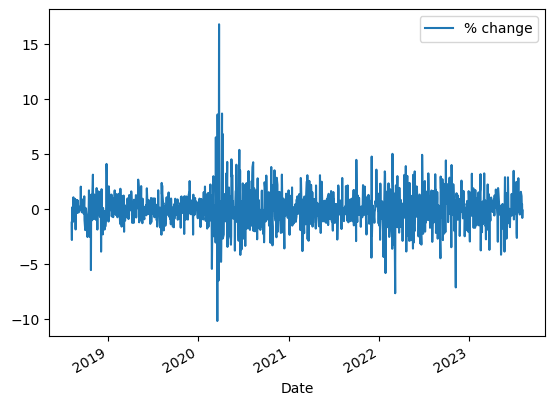

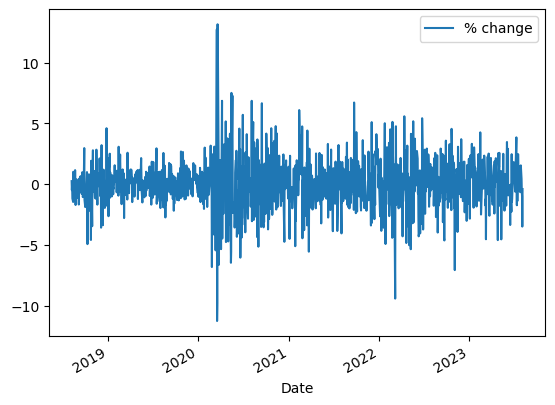

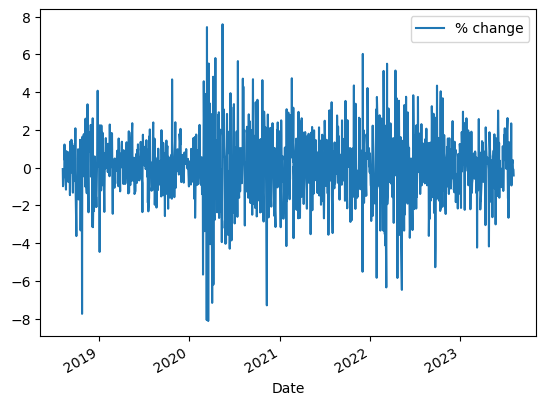

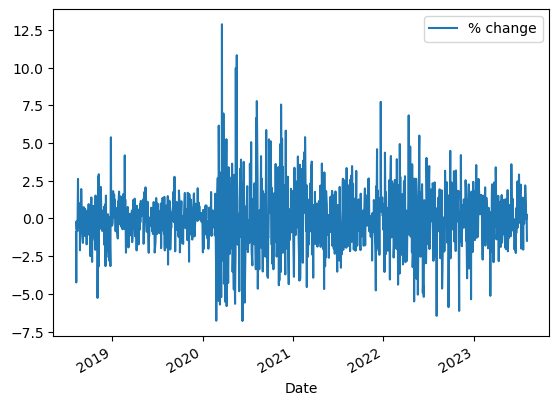

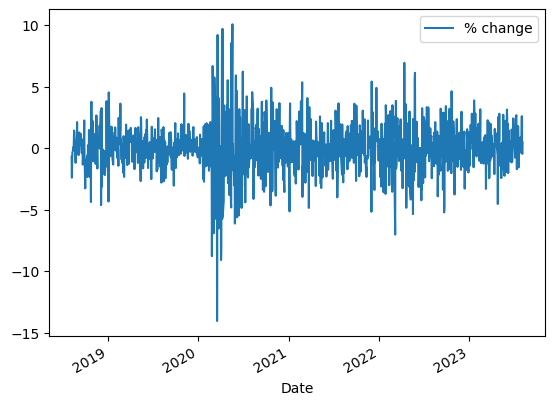

In [18]:
stocks_hist.groupby('Stock')[['Date', '% change']].plot(x="Date")
plt.show()

## AdvisorShares Hotel ETF (BEDZ)
#### Top 10 Holdings (51.56% of Total Assets)

Name	| Symbol	| % Assets
|:--|--|--:|
Marriott International Inc Class A	| MAR	|5.76%
Booking Holdings Inc	| BKNG	| 5.68%
Ryman Hospitality Properties Inc	| RHP	| 5.51%
GreenTree Hospitality Group Ltd ADR	| GHG	| 5.20%
Bluegreen Vacations Holding Corp Class A	| BVH	| 5.14%
Airbnb Inc Ordinary Shares - Class A	| ABNB	| 4.99%
Boyd Gaming Corp	| BYD	| 4.93%
Royal Caribbean Group	| RCL	| 4.85%
Hyatt Hotels Corp Class A	| H	| 4.77%
Hilton Worldwide Holdings Inc	| HLT	| 4.74%

_Note:_ Dow Jones U.S. Hotels Index (^DJUSLG) does not have enough data available to be used 

In [68]:
symbol = "BEDZ"

BEDZ = yf.Ticker(symbol)
df = BEDZ.history(period=period, start=start, end=end)
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2021-04-21 00:00:00-04:00,24.558191,24.947370,24.558191,24.894482,84500,0.0,0.0,0.0
2021-04-22 00:00:00-04:00,24.987285,25.336547,24.857558,24.995268,15400,0.0,0.0,0.0
2021-04-23 00:00:00-04:00,25.146948,25.296632,25.126990,25.263700,11700,0.0,0.0,0.0
2021-04-26 00:00:00-04:00,25.526148,25.675832,25.369479,25.373470,33700,0.0,0.0,0.0
2021-04-27 00:00:00-04:00,25.516169,25.715748,25.426358,25.584026,29100,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2023-07-31 00:00:00-04:00,27.080000,27.090000,26.914000,26.914000,600,0.0,0.0,0.0
2023-08-01 00:00:00-04:00,26.520000,26.750000,26.520000,26.743999,800,0.0,0.0,0.0
2023-08-02 00:00:00-04:00,26.457001,26.490000,26.457001,26.490000,700,0.0,0.0,0.0
